# Favorite utility libraries

These are just a few i could think of hopefully we can add more..

---



# Visualization
---



### Seaborn

https://seaborn.pydata.org/

`pip install seaborn`

seaborn sits on top of matplotlib, and makes it less fugly and often easier to use. watch: 
    

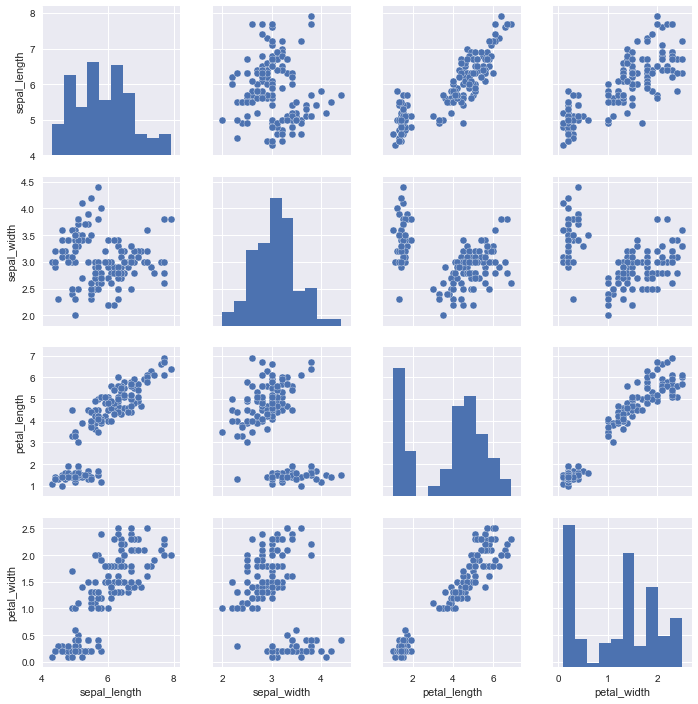

In [1]:
import matplotlib.pyplot as plt # we still need to import matplotlib
import seaborn as sb # then import seaborn 

iris = sb.load_dataset("iris")
sb.pairplot(iris); plt.show()

it has good palettes so no more matplotlib primary colours:

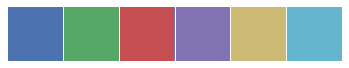

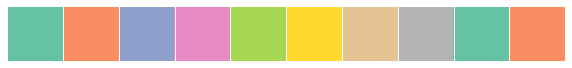

In [2]:
#plot the default palette
current_palette = sb.color_palette()
sb.palplot(current_palette); plt.show()

# set the palette to Set2, say I want 10 colours
sb.set_palette(sb.color_palette("Set2", 10))
sb.palplot(sb.color_palette()); plt.show()

---



# Numpy Utils

---

### Bcolz

https://github.com/Blosc/bcolz

`pip install bcolz`

Oh my god dude have you ever tried to save a numpy array? you think this should be fine and call `np.save` on some 32 bit floating point arrays and all then it takes **fucking hours** and is like **30gb**. Bcolz is the answer. It saves large numpy arrays in a reasonable amount of time at a fairly reasonable file size and what's better: **you can work off disk ** so if you have a crazy big array of images that you can't fit in memory and you want to feed them into keras or something you can just make a generator like this:


In [13]:
import bcolz

def gen_stuff(batch_size, n_batches):
    with bcolz.open(rootdir="data/my_giant_array") as arr:
        for i in range(batch_size//n_batches):
            yield arr[i:i+batch_size, :, :]
    

note:
   - since bcolz does low level stuff and keeps stuff open ( like everywhere i think) when working off disk you always need to call the carray with a `with` statement or call `flush()` after youre done: 
   i.e 
   ```python
   c = bcolz.carray(a, rootdir='mydir')
   c.flush()
   ```

tutorials are buried a little bit in the github, but they have a set of good [tutorials]( https://github.com/Blosc/bcolz/blob/master/docs/tutorials.ipynb) in ipython notebooks that are really helpful


---


# Other

---


### kaggle cli 

https://github.com/floydwch/kaggle-cli

`pip install kaggle-cli`

kaggle cli is the unofficial command line interface for kaggle. You can download datasets, or files and make submissions via the command line. This is useful if you are using an AWS instance or really hate clicking through websites.

here's an example making a submission to titanic witha  message (`-m`):

` kg submit sampleSubmission.csv -c titanic-gettingStarted -u USERNAME -p PASSWORD -m "Enter a brief description of this submission here."`

note:
   - If you've set up your kaggle account through a channel like google or linked in or whatever you may need to reset your kaggle password in order to use it.
   - If you are doing a non-playground competition that requires an agreement you will need to do that on the kaggle site before you can download anything with the cli.
   
